In [1]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["INR", "EUR"]
    total_amount: float

In [2]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState: 
    state['total_amount'] = state['total_usd'] * 85
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total_amount'] = state['total_usd'] * 0.9
    return state

def choose_target_currency(state: PortfolioState) -> str:
    return state['target_currency']

In [3]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_usd_node", calc_total_usd)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_usd_node")
builder.add_conditional_edges(
    "calc_total_usd_node",
    choose_target_currency,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node"
    }
)
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

graph = builder.compile()

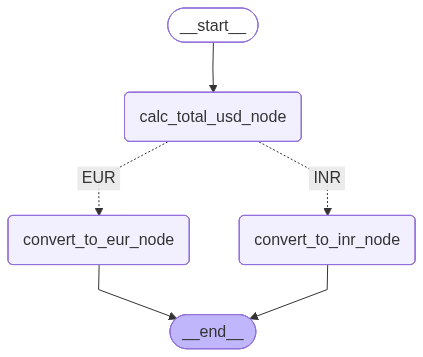

In [4]:
graph

In [6]:
graph.invoke({"amount_usd": 100, "target_currency": "INR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'INR',
 'total_amount': 9180.0}

In [7]:
graph.invoke({"amount_usd": 100, "target_currency": "EUR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'EUR',
 'total_amount': 97.2}